In [ ]:
# default_exp think_bays_survival_analysis

# think_bays_survival_analysis

> API details.

In [ ]:
#hide
from nbdev.showdoc import *

### Weibull distribution

In [ ]:
%matplotlib inline
from scipy.stats import weibull_min

def weibull_dist(lam, k):
    return weibull_min(k, scale=lam)

In [ ]:
# Create a Weibull distribution with λ = 3 and k = 0.8
lam, k = 3, 0.8
actual_dist = weibull_dist(lam, k)

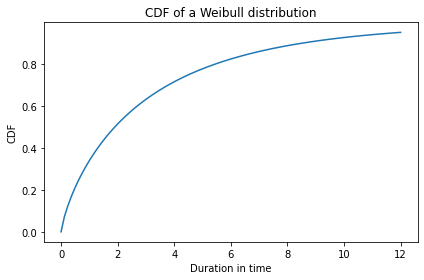

In [ ]:
# Plot
import numpy as np
from empiricaldist import Cdf
from utils import decorate

qs = np.linspace(0, 12, 101)
ps = actual_dist.cdf(qs)
cdf = Cdf(ps, qs)
cdf.plot()
decorate(xlabel="Duration in time", ylabel="CDF", title="CDF of a Weibull distribution")

### Given the distribution, generate a sample dataset

In [ ]:
# Generate data
data = actual_dist.rvs(10)
data

array([ 8.54250892,  1.8214791 ,  0.04779556, 11.39936263,  1.24026171,
        1.80862413,  2.51828175,  5.83358327,  1.80516641,  2.27235525])

### Given the data, assume we do not know its distribution, find it posterior dist

In [ ]:
from utils import make_uniform
from utils import make_joint

# Make a uniform prior of lambda
lams = np.linspace(0.1, 10.1, 101)
prior_lam = make_uniform(lams, name="lambda")

# Make a uniform prior of k
ks = np.linspace(0.1, 5.1, 101)
prior_k = make_uniform(ks, name="k")

# Create joint distribution of lambda and k
prior = make_joint(prior_lam, prior_k)

In [ ]:
prior_lam * prior_k

,probs
0.10,0.000098
0.15,0.000000
0.20,0.000098
0.25,0.000000
0.30,0.000098
...,...
9.70,0.000000
9.80,0.000000
9.90,0.000000
10.00,0.000000


In [ ]:
# Make a 3D mesh with lambda, k, and data
lam_mesh, k_mesh, data_mesh = np.meshgrid(prior.columns, prior.index, data)

In [ ]:
# Use weibull_dist to compute pdf of the Weibull distribution
densities = weibull_dist(lam_mesh, k_mesh).pdf(data_mesh)
densities.shape

(101, 101, 10)

In [ ]:
# Likelihood based on the data axis (2)
likelihood = densities.prod(axis=2)
likelihood.sum()

3.6307546227739403e-08

In [ ]:
# Compute the posterior distribution
from utils import normalize

posterior = prior * likelihood
normalize(posterior)

3.5592144130712085e-12

In [ ]:
def update_weibull(prior, data):
    """Update the prior based on data."""
    lam_mesh, k_mesh, data_mesh = np.meshgrid(prior.columns, prior.index, data)
    
    densities = weibull_dist(lam_mesh, k_mesh).pdf(data_mesh)
    likelihood = densities.prod(axis=2)
    
    posterior = prior * likelihood
    normalize(posterior)
    
    return posterior

In [ ]:
posterior = update_weibull(prior, data)

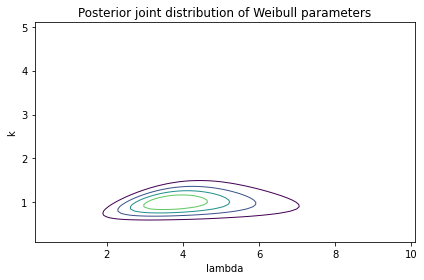

In [ ]:
from utils import plot_contour

plot_contour(posterior)
decorate(title='Posterior joint distribution of Weibull parameters')